In [199]:
import pandas as pd 
import pickle 


In [200]:
# with open("results/ARFF_CNS.pkl",'rb') as f:
#     results=pickle.load(f)
# db=pd.read_csv("after_preprocess/"+"ARFF_CNS"+".csv",header=0)
# columns=list(db.columns)

In [201]:
def get_fold(x):
    if x<50:
        return "Leave-pair-out"
    elif x<=100:
        return "LOOCV"
    elif x<=1000:
        return "StratifiedKFold n_splits = 10"
    else:
        return "StratifiedKFold n_splits = 5"


def turn_resDict_to_df(results,columns):
    all_df=[]
    for algo_name,fs_algo_lst in list(results.items())[:-3]:
        # database_name= results
        for k, k_res in list(fs_algo_lst.items())[:-1]:
            fs_time= fs_algo_lst["fs_algo"]
            chosen_features= k_res["chosen_features"]
            feature_rank= k_res["feature_rank"]
            for clf_name,clf_res in list(k_res.items())[2:]:
                for fold_name, fold_res in clf_res.items():
                    # print(fold_res)
                    infrence_time=fold_res["infrence_time"]
                    # del fold_res["infrence_time"]
                    temp_d=pd.DataFrame.from_dict(fold_res, orient='index')
                    temp_d.reset_index(inplace=True)
                    temp_d=temp_d.melt(id_vars='index')
                    temp_d.drop(columns=['variable'],inplace=True)
                    temp_d["infrence_time"]=[infrence_time]*temp_d.shape[0]
                    temp_d["Learning algorithm"]=[clf_name]*temp_d.shape[0]
                    temp_d["Number of features selected (K)"]=[k]*temp_d.shape[0]
                    temp_d["chosen_features"]=[chosen_features]*temp_d.shape[0]
                    temp_d["Selected Features scores"]=[feature_rank]*temp_d.shape[0]
                    temp_d["Filtering Algorithm"]=[algo_name]*temp_d.shape[0]
                    temp_d["Fold"]=[fold_name]*temp_d.shape[0]
                    temp_d["fs_time"]=[fs_time]*temp_d.shape[0]
                    all_df.append(temp_d.copy(deep=True))
    all_df=pd.concat(all_df, ignore_index=True)
    all_df["Dataset Name"]=results["Dataset Name"]
    all_df["Number of samples"]=results["Number of samples"]
    all_df["Original Number of features"]=results["Original Number of features"]
    all_df["chosen_features"]= all_df["chosen_features"].apply(lambda x: [columns[i] for i in x])
    all_df["CV Method"]=get_fold(results["Original Number of features"])
    return all_df


# t=turn_resDict_to_df(results,columns)


In [202]:
# temp= pd.read_csv("after_preprocess/datamicroarray_gravier_results.csv",header=0)

In [203]:
# df= pd.read_csv("results/datamicroarray_gordon_results.csv",header=0)

In [204]:

from os import listdir
from os.path import isfile, join
files= [f for f in listdir("results") if isfile(join("results", f))]


In [205]:
all_files=[]
for file in files:
    all_files.append(pd.read_csv("results/"+file,header=0))
    

In [206]:
len(all_files)

19

In [207]:
df= pd.concat(all_files, ignore_index=True)

In [208]:
#rename index colum to metric
df.rename(columns={"index":"metric"},inplace=True)

In [209]:
df

,metric,value,infrence_time,Learning algorithm,Number of features selected (K),chosen_features,Selected Features scores,Filtering Algorithm,Fold,fs_time,Dataset Name,Number of samples,Original Number of features,CV Method
0,accuracy,3.636364e-01,7.625980e-07,LogisticRegression,1,['5965'],[1],dssa,0,89.578035,scikit_Prostate-GE,102,5966,StratifiedKFold n_splits = 5
1,MCC,-2.666667e-01,7.625980e-07,LogisticRegression,1,['5965'],[1],dssa,0,89.578035,scikit_Prostate-GE,102,5966,StratifiedKFold n_splits = 5
2,AUC,4.166667e-01,7.625980e-07,LogisticRegression,1,['5965'],[1],dssa,0,89.578035,scikit_Prostate-GE,102,5966,StratifiedKFold n_splits = 5
3,PR-AUC,4.910714e-01,7.625980e-07,LogisticRegression,1,['5965'],[1],dssa,0,89.578035,scikit_Prostate-GE,102,5966,StratifiedKFold n_splits = 5
4,infrence_time,7.625980e-07,7.625980e-07,LogisticRegression,1,['5965'],[1],dssa,0,89.578035,scikit_Prostate-GE,102,5966,StratifiedKFold n_splits = 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312895,accuracy,7.727273e-01,3.981050e-06,SVC,100,"['ENSG00000179163', 'ENSG00000112232', 'ENSG00...",[13721 3719 9378 13389 10014 12829 10029 76...,SVM,9,5109.348777,bioconductor_COPDSexualDimorphism,229,14498,StratifiedKFold n_splits = 5
312896,MCC,3.985267e-01,3.981050e-06,SVC,100,"['ENSG00000179163', 'ENSG00000112232', 'ENSG00...",[13721 3719 9378 13389 10014 12829 10029 76...,SVM,9,5109.348777,bioconductor_COPDSexualDimorphism,229,14498,StratifiedKFold n_splits = 5
312897,AUC,7.604167e-01,3.981050e-06,SVC,100,"['ENSG00000179163', 'ENSG00000112232', 'ENSG00...",[13721 3719 9378 13389 10014 12829 10029 76...,SVM,9,5109.348777,bioconductor_COPDSexualDimorphism,229,14498,StratifiedKFold n_splits = 5
312898,PR-AUC,5.908120e-01,3.981050e-06,SVC,100,"['ENSG00000179163', 'ENSG00000112232', 'ENSG00...",[13721 3719 9378 13389 10014 12829 10029 76...,SVM,9,5109.348777,bioconductor_COPDSexualDimorphism,229,14498,StratifiedKFold n_splits = 5


In [210]:
def return_best_config(df):
    t= df[df["index"]=="accuracy"].groupby(["Filtering Algorithm","Number of features selected (K)","Learning algorithm"]).mean().reset_index()
    t=t.sort_values(by=["value"],ascending=False).iloc[0]
    return t

In [211]:
len(df["Dataset Name"].unique())

19

In [212]:
#calcalute the number of each Filtering Algorithm was able to achive the best performance in auc index
def mean_of_each_fold(df):
    t= df[df["metric"]=="PR-AUC"].groupby(["Dataset Name","Filtering Algorithm","Number of features selected (K)","Learning algorithm"]).mean().reset_index()
    
    # t=t.sort_values(by=["value"],ascending=False).iloc[0]
    return t
mean_auc_df= mean_of_each_fold(df)

In [213]:
mean_auc_df["Filtering Algorithm"].unique()

array(['Genetic', 'MRMR', 'New_dssa', 'ReliefF', 'SVM', 'dssa',
       'f_classif'], dtype=object)

In [214]:
mean_auc_df

,Dataset Name,Filtering Algorithm,Number of features selected (K),Learning algorithm,value,infrence_time,Fold,fs_time,Number of samples,Original Number of features
0,ARFF_Breast,Genetic,1,GaussianNB,0.548910,0.002006,0.0,1122.572471,97.0,24188.0
1,ARFF_Breast,Genetic,1,KNeighborsClassifier,0.512317,0.005323,0.0,1122.572471,97.0,24188.0
2,ARFF_Breast,Genetic,1,LogisticRegression,0.555438,0.090168,0.0,1122.572471,97.0,24188.0
3,ARFF_Breast,Genetic,1,RandomForestClassifier,0.591304,3.241827,0.0,1122.572471,97.0,24188.0
4,ARFF_Breast,Genetic,1,SVC,0.496493,0.005149,0.0,1122.572471,97.0,24188.0
...,...,...,...,...,...,...,...,...,...,...
7975,scikit_arcene,f_classif,100,GaussianNB,0.631607,0.000019,4.5,0.073584,200.0,9961.0
7976,scikit_arcene,f_classif,100,KNeighborsClassifier,0.759161,0.000085,4.5,0.073584,200.0,9961.0
7977,scikit_arcene,f_classif,100,LogisticRegression,0.800358,0.000014,4.5,0.073584,200.0,9961.0
7978,scikit_arcene,f_classif,100,RandomForestClassifier,0.831886,0.000635,4.5,0.073584,200.0,9961.0


In [215]:
# mean_aug_df
#calcalute the number of each Filtering Algorithm was able to achive the best performance in auc index
def best_of_dataset(df):
    # t= df.groupby(["Dataset Name"])["value"].agg('max')
    idx=df.groupby(['Dataset Name'])['value'].idxmax()
    t=df.loc[idx]
    return t
best_df= best_of_dataset(mean_auc_df)

In [216]:
best_df

,Dataset Name,Filtering Algorithm,Number of features selected (K),Learning algorithm,value,infrence_time,Fold,fs_time,Number of samples,Original Number of features
222,ARFF_Breast,ReliefF,25,LogisticRegression,0.922127,0.143663,0.0,2.397883,97.0,24188.0
827,ARFF_CNS,f_classif,30,LogisticRegression,0.857731,0.165202,0.0,0.031878,60.0,7129.0
1068,ARFF_Leukemia,ReliefF,30,RandomForestClassifier,1.000000,3.631772,0.0,0.166363,72.0,7129.0
1673,ARFF_Lung,f_classif,50,RandomForestClassifier,0.986403,0.000562,4.5,0.102427,203.0,12600.0
1737,ARFF_Ovarian,Genetic,100,LogisticRegression,1.000000,0.000040,4.5,8.035315,253.0,15154.0
2472,bioconductor_ALL,f_classif,3,LogisticRegression,0.887840,0.000002,4.5,0.058712,128.0,12625.0
2759,bioconductor_COPDSexualDimorphism,ReliefF,100,SVC,0.842682,0.000004,4.5,7.383736,229.0,14498.0
3359,bioconductor_DLBCL,f_classif,100,SVC,0.659010,0.000045,4.5,0.036908,194.0,3583.0
3597,bioconductor_bcellViper,ReliefF,100,LogisticRegression,0.855405,0.000012,4.5,73.147354,211.0,6249.0
4162,datamicroarray_alon,f_classif,5,LogisticRegression,0.972302,0.090721,0.0,0.014556,62.0,2000.0


In [217]:
# t= best_df.groupby("Filtering Algorithm")["Dataset Name"].count().reset_index()
# for algo in mean_auc_df["Filtering Algorithm"].unique():
#     if algo not in t["Filtering Algorithm"].unique():
#         t=t.append({"Filtering Algorithm":algo,"Dataset Name":0},ignore_index=True)

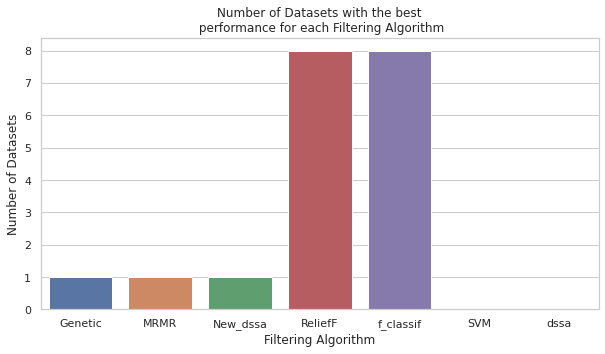

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
t= best_df.groupby("Filtering Algorithm")["Dataset Name"].count().reset_index()
for algo in mean_auc_df["Filtering Algorithm"].unique():
    if algo not in t["Filtering Algorithm"].unique():
        t=t.append({"Filtering Algorithm":algo,"Dataset Name":0},ignore_index=True)

# sns.barplot(best_df, x="Filtering Algorithm",)
plt.figure(figsize=(10,5))

sns.barplot(data= t,x="Filtering Algorithm",y="Dataset Name",)
#rename axis 
plt.xlabel("Filtering Algorithm")
plt.ylabel("Number of Datasets")
plt.title("Number of Datasets with the best\n performance for each Filtering Algorithm")
#change the fig size 
plt.show()

In [219]:
mean_auc_df

,Dataset Name,Filtering Algorithm,Number of features selected (K),Learning algorithm,value,infrence_time,Fold,fs_time,Number of samples,Original Number of features
0,ARFF_Breast,Genetic,1,GaussianNB,0.548910,0.002006,0.0,1122.572471,97.0,24188.0
1,ARFF_Breast,Genetic,1,KNeighborsClassifier,0.512317,0.005323,0.0,1122.572471,97.0,24188.0
2,ARFF_Breast,Genetic,1,LogisticRegression,0.555438,0.090168,0.0,1122.572471,97.0,24188.0
3,ARFF_Breast,Genetic,1,RandomForestClassifier,0.591304,3.241827,0.0,1122.572471,97.0,24188.0
4,ARFF_Breast,Genetic,1,SVC,0.496493,0.005149,0.0,1122.572471,97.0,24188.0
...,...,...,...,...,...,...,...,...,...,...
7975,scikit_arcene,f_classif,100,GaussianNB,0.631607,0.000019,4.5,0.073584,200.0,9961.0
7976,scikit_arcene,f_classif,100,KNeighborsClassifier,0.759161,0.000085,4.5,0.073584,200.0,9961.0
7977,scikit_arcene,f_classif,100,LogisticRegression,0.800358,0.000014,4.5,0.073584,200.0,9961.0
7978,scikit_arcene,f_classif,100,RandomForestClassifier,0.831886,0.000635,4.5,0.073584,200.0,9961.0


In [220]:
#fuller picture about the best performing algorithms
def rank_Filtering_of_dataset(df,all_rank=False):
    # t= df.groupby(["Dataset Name"])["value"].agg('max')
    if all_rank:
        t=df
    else:    
        idx=df.groupby(['Dataset Name',"Filtering Algorithm"])['value'].idxmax()
        n_algo= len(df["Filtering Algorithm"].unique())
        t=df.loc[idx]
    t.sort_values(by=["Dataset Name","value"],ascending=False,inplace=True)
    #group by and iterate over the dataset names and add the position of each algorithm in the list
    t["rank"]=n_algo-t.groupby(["Dataset Name"])["Filtering Algorithm"].cumcount()
    return t
algo_ranking= rank_Filtering_of_dataset(mean_auc_df)


In [221]:
algo_ranking

,Dataset Name,Filtering Algorithm,Number of features selected (K),Learning algorithm,value,infrence_time,Fold,fs_time,Number of samples,Original Number of features,rank
7799,scikit_arcene,ReliefF,100,SVC,0.908404,0.000005,4.5,6.165671,200.0,9961.0,7
7858,scikit_arcene,SVM,100,RandomForestClassifier,0.889319,0.000089,4.5,2023.215620,200.0,9961.0,6
7738,scikit_arcene,New_dssa,100,RandomForestClassifier,0.887752,0.000480,4.5,205.670516,200.0,9961.0,5
7618,scikit_arcene,Genetic,100,RandomForestClassifier,0.876961,0.000310,4.5,1232.903843,200.0,9961.0,4
7678,scikit_arcene,MRMR,100,RandomForestClassifier,0.867086,0.000661,4.5,67.960358,200.0,9961.0,3
...,...,...,...,...,...,...,...,...,...,...,...
57,ARFF_Breast,Genetic,100,LogisticRegression,0.753621,0.132252,0.0,1122.572471,97.0,24188.0,5
278,ARFF_Breast,SVM,20,RandomForestClassifier,0.728979,3.104469,0.0,3169.971696,97.0,24188.0,4
357,ARFF_Breast,dssa,100,LogisticRegression,0.694807,0.171478,0.0,601.382937,97.0,24188.0,3
157,ARFF_Breast,New_dssa,20,LogisticRegression,0.634321,0.141277,0.0,601.548028,97.0,24188.0,2


In [222]:
algo_ranking.groupby("Filtering Algorithm")["rank"].mean()

Filtering Algorithm
Genetic      3.157895
MRMR         3.368421
New_dssa     3.789474
ReliefF      5.526316
SVM          3.368421
dssa         3.105263
f_classif    5.684211
Name: rank, dtype: float64

<AxesSubplot:xlabel='Filtering Algorithm', ylabel='rank'>

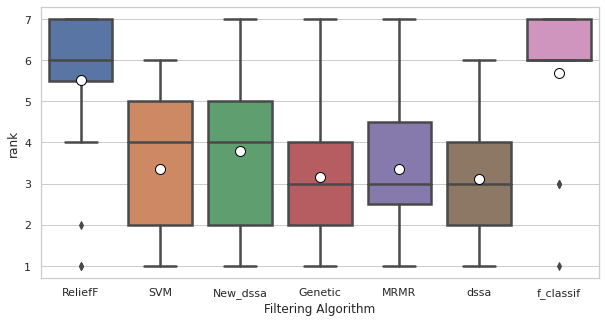

In [223]:
import seaborn as sns


plt.figure(figsize=(10,5))

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Filtering Algorithm", y="rank",data=algo_ranking,orient="v",linewidth=2.5,
            showmeans=True,  meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
# sns.swarmplot(x="Filtering Algorithm", y="rank",data=algo_ranking, color=".25")
# plt.ylim(reversed(plt.ylim()))
# sns.despine(offset=10, trim=True)

In [224]:
def bin_func(x):
    if x<=100:
        return "1-100"
    elif x<=200:
        return "100-200"
    return "200+"
df['binned_number_samples'] = pd.qcut(df['Number of samples'],q=3)


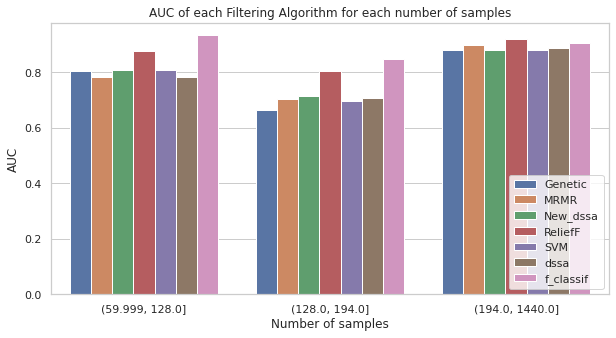

In [225]:
algo_ranking["bin_n_sample"]= pd.qcut(algo_ranking['Number of samples'],q=3)
temp=algo_ranking.groupby(["Dataset Name","bin_n_sample"])["value"].max().reset_index()
temp=algo_ranking.groupby(["bin_n_sample","Filtering Algorithm"])["value"].mean().reset_index()
# temp["Dataset Name"]=algo_ranking["Dataset Name"].unique()

plt.figure(figsize=(10,5))
sns.barplot(x="bin_n_sample", y="value", hue="Filtering Algorithm", data=temp)
#name the axis
plt.xlabel("Number of samples")
plt.ylabel("AUC")
plt.title("AUC of each Filtering Algorithm for each number of samples")
#move legend to the right bottom corner
plt.legend(loc="lower right")

plt.show()



In [226]:
algo_ranking

,Dataset Name,Filtering Algorithm,Number of features selected (K),Learning algorithm,value,infrence_time,Fold,fs_time,Number of samples,Original Number of features,rank,bin_n_sample
7799,scikit_arcene,ReliefF,100,SVC,0.908404,0.000005,4.5,6.165671,200.0,9961.0,7,"(194.0, 1440.0]"
7858,scikit_arcene,SVM,100,RandomForestClassifier,0.889319,0.000089,4.5,2023.215620,200.0,9961.0,6,"(194.0, 1440.0]"
7738,scikit_arcene,New_dssa,100,RandomForestClassifier,0.887752,0.000480,4.5,205.670516,200.0,9961.0,5,"(194.0, 1440.0]"
7618,scikit_arcene,Genetic,100,RandomForestClassifier,0.876961,0.000310,4.5,1232.903843,200.0,9961.0,4,"(194.0, 1440.0]"
7678,scikit_arcene,MRMR,100,RandomForestClassifier,0.867086,0.000661,4.5,67.960358,200.0,9961.0,3,"(194.0, 1440.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
57,ARFF_Breast,Genetic,100,LogisticRegression,0.753621,0.132252,0.0,1122.572471,97.0,24188.0,5,"(59.999, 128.0]"
278,ARFF_Breast,SVM,20,RandomForestClassifier,0.728979,3.104469,0.0,3169.971696,97.0,24188.0,4,"(59.999, 128.0]"
357,ARFF_Breast,dssa,100,LogisticRegression,0.694807,0.171478,0.0,601.382937,97.0,24188.0,3,"(59.999, 128.0]"
157,ARFF_Breast,New_dssa,20,LogisticRegression,0.634321,0.141277,0.0,601.548028,97.0,24188.0,2,"(59.999, 128.0]"


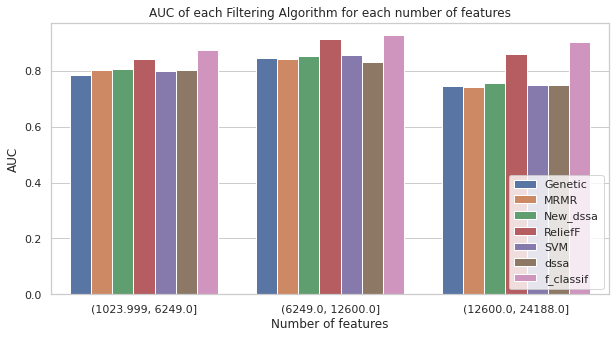

In [227]:
algo_ranking["bin_n_sample"]= pd.qcut(algo_ranking['Original Number of features'],q=3)
temp=algo_ranking.groupby(["Dataset Name","bin_n_sample"])["value"].max().reset_index()
temp=algo_ranking.groupby(["bin_n_sample","Filtering Algorithm"])["value"].mean().reset_index()
# temp["Dataset Name"]=algo_ranking["Dataset Name"].unique()

plt.figure(figsize=(10,5))
sns.barplot(x="bin_n_sample", y="value", hue="Filtering Algorithm", data=temp)
#name the axis
plt.xlabel("Number of features")
plt.ylabel("AUC")
plt.title("AUC of each Filtering Algorithm for each number of features")
#move legend to the right bottom corner
plt.legend(loc="lower right")

plt.show()



In [228]:
idx= mean_auc_df.groupby(["Dataset Name","Filtering Algorithm","Number of features selected (K)"])["value"].idxmax()
mean_auc_df.loc[idx]

,Dataset Name,Filtering Algorithm,Number of features selected (K),Learning algorithm,value,infrence_time,Fold,fs_time,Number of samples,Original Number of features
3,ARFF_Breast,Genetic,1,RandomForestClassifier,0.591304,3.241827,0.0,1122.572471,97.0,24188.0
7,ARFF_Breast,Genetic,2,LogisticRegression,0.499246,0.104856,0.0,1122.572471,97.0,24188.0
13,ARFF_Breast,Genetic,3,RandomForestClassifier,0.583100,3.182825,0.0,1122.572471,97.0,24188.0
18,ARFF_Breast,Genetic,4,RandomForestClassifier,0.523978,3.203051,0.0,1122.572471,97.0,24188.0
23,ARFF_Breast,Genetic,5,RandomForestClassifier,0.557947,3.205720,0.0,1122.572471,97.0,24188.0
...,...,...,...,...,...,...,...,...,...,...
7957,scikit_arcene,f_classif,20,LogisticRegression,0.786004,0.000039,4.5,0.073584,200.0,9961.0
7962,scikit_arcene,f_classif,25,LogisticRegression,0.802371,0.000040,4.5,0.073584,200.0,9961.0
7967,scikit_arcene,f_classif,30,LogisticRegression,0.794806,0.000035,4.5,0.073584,200.0,9961.0
7972,scikit_arcene,f_classif,50,LogisticRegression,0.822498,0.000034,4.5,0.073584,200.0,9961.0


In [229]:
mean_auc_df["bin_n_sample"]= mean_auc_df["Number of samples"].apply(lambda x: bin_func(x))
mean_auc_df

,Dataset Name,Filtering Algorithm,Number of features selected (K),Learning algorithm,value,infrence_time,Fold,fs_time,Number of samples,Original Number of features,bin_n_sample
0,ARFF_Breast,Genetic,1,GaussianNB,0.548910,0.002006,0.0,1122.572471,97.0,24188.0,1-100
1,ARFF_Breast,Genetic,1,KNeighborsClassifier,0.512317,0.005323,0.0,1122.572471,97.0,24188.0,1-100
2,ARFF_Breast,Genetic,1,LogisticRegression,0.555438,0.090168,0.0,1122.572471,97.0,24188.0,1-100
3,ARFF_Breast,Genetic,1,RandomForestClassifier,0.591304,3.241827,0.0,1122.572471,97.0,24188.0,1-100
4,ARFF_Breast,Genetic,1,SVC,0.496493,0.005149,0.0,1122.572471,97.0,24188.0,1-100
...,...,...,...,...,...,...,...,...,...,...,...
7975,scikit_arcene,f_classif,100,GaussianNB,0.631607,0.000019,4.5,0.073584,200.0,9961.0,100-200
7976,scikit_arcene,f_classif,100,KNeighborsClassifier,0.759161,0.000085,4.5,0.073584,200.0,9961.0,100-200
7977,scikit_arcene,f_classif,100,LogisticRegression,0.800358,0.000014,4.5,0.073584,200.0,9961.0,100-200
7978,scikit_arcene,f_classif,100,RandomForestClassifier,0.831886,0.000635,4.5,0.073584,200.0,9961.0,100-200


In [230]:
["scikit_COIL20", "datamicroarray_alon", "bioconductor_ALL"]

['scikit_COIL20', 'datamicroarray_alon', 'bioconductor_ALL']

In [231]:
mean_auc_df

,Dataset Name,Filtering Algorithm,Number of features selected (K),Learning algorithm,value,infrence_time,Fold,fs_time,Number of samples,Original Number of features,bin_n_sample
0,ARFF_Breast,Genetic,1,GaussianNB,0.548910,0.002006,0.0,1122.572471,97.0,24188.0,1-100
1,ARFF_Breast,Genetic,1,KNeighborsClassifier,0.512317,0.005323,0.0,1122.572471,97.0,24188.0,1-100
2,ARFF_Breast,Genetic,1,LogisticRegression,0.555438,0.090168,0.0,1122.572471,97.0,24188.0,1-100
3,ARFF_Breast,Genetic,1,RandomForestClassifier,0.591304,3.241827,0.0,1122.572471,97.0,24188.0,1-100
4,ARFF_Breast,Genetic,1,SVC,0.496493,0.005149,0.0,1122.572471,97.0,24188.0,1-100
...,...,...,...,...,...,...,...,...,...,...,...
7975,scikit_arcene,f_classif,100,GaussianNB,0.631607,0.000019,4.5,0.073584,200.0,9961.0,100-200
7976,scikit_arcene,f_classif,100,KNeighborsClassifier,0.759161,0.000085,4.5,0.073584,200.0,9961.0,100-200
7977,scikit_arcene,f_classif,100,LogisticRegression,0.800358,0.000014,4.5,0.073584,200.0,9961.0,100-200
7978,scikit_arcene,f_classif,100,RandomForestClassifier,0.831886,0.000635,4.5,0.073584,200.0,9961.0,100-200


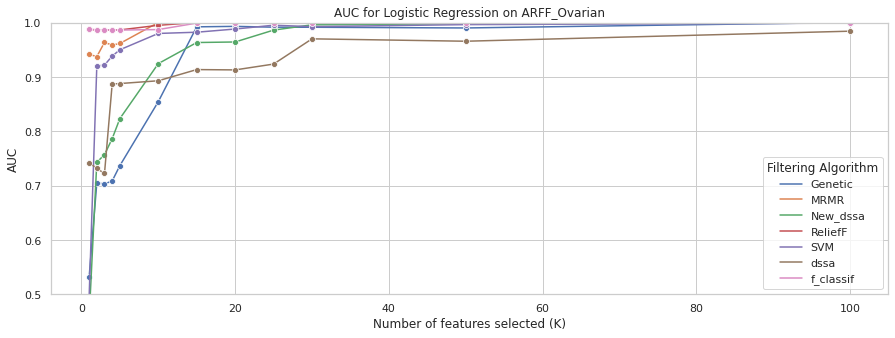

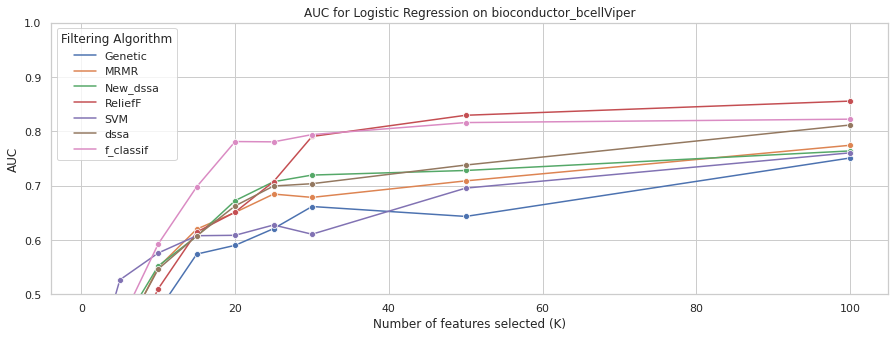

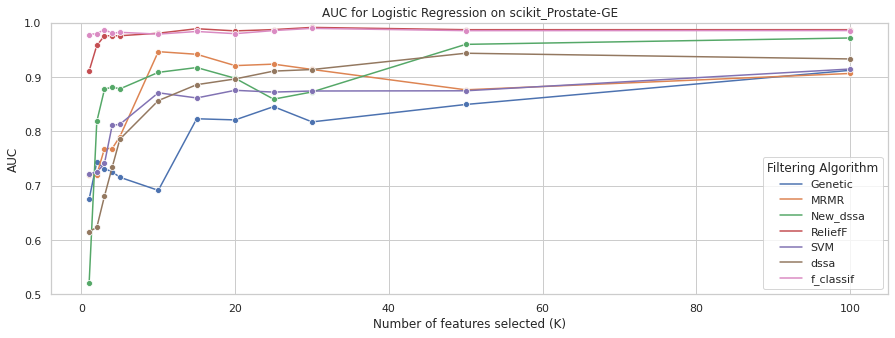

In [232]:
for dataset in ["ARFF_Ovarian", "bioconductor_bcellViper", "scikit_Prostate-GE"]:
    plt.figure(figsize=(15,5))
    data_set= mean_auc_df[(mean_auc_df["Dataset Name"]==dataset) & (mean_auc_df["Learning algorithm"]=="LogisticRegression")]
    sns.lineplot(data=data_set, x="Number of features selected (K)", y="value", hue="Filtering Algorithm",marker="o")
    #add markers to the points
    #name the axis
    plt.xlabel("Number of features selected (K)")
    plt.ylabel("AUC")
    plt.title("AUC for Logistic Regression on "+dataset)
    plt.ylim(0.5,1)
    plt.show()

# limit the y axis to the range [0.5,1]


In [233]:
df["Dataset Name"].unique()

array(['scikit_Prostate-GE', 'ARFF_Leukemia', 'scikit_TOX-171',
       'datamicroarray_alon', 'datamicroarray_gravier', 'ARFF_CNS',
       'bioconductor_DLBCL', 'datamicroarray_gordon',
       'scikit_CLL-SUB-111', 'ARFF_Ovarian', 'bioconductor_ALL',
       'datamicroarray_tian', 'scikit_COIL20', 'scikit_arcene',
       'ARFF_Lung', 'datamicroarray_chiaretti', 'bioconductor_bcellViper',
       'ARFF_Breast', 'bioconductor_COPDSexualDimorphism'], dtype=object)

In [234]:
df

,metric,value,infrence_time,Learning algorithm,Number of features selected (K),chosen_features,Selected Features scores,Filtering Algorithm,Fold,fs_time,Dataset Name,Number of samples,Original Number of features,CV Method,binned_number_samples
0,accuracy,3.636364e-01,7.625980e-07,LogisticRegression,1,['5965'],[1],dssa,0,89.578035,scikit_Prostate-GE,102,5966,StratifiedKFold n_splits = 5,"(59.999, 168.0]"
1,MCC,-2.666667e-01,7.625980e-07,LogisticRegression,1,['5965'],[1],dssa,0,89.578035,scikit_Prostate-GE,102,5966,StratifiedKFold n_splits = 5,"(59.999, 168.0]"
2,AUC,4.166667e-01,7.625980e-07,LogisticRegression,1,['5965'],[1],dssa,0,89.578035,scikit_Prostate-GE,102,5966,StratifiedKFold n_splits = 5,"(59.999, 168.0]"
3,PR-AUC,4.910714e-01,7.625980e-07,LogisticRegression,1,['5965'],[1],dssa,0,89.578035,scikit_Prostate-GE,102,5966,StratifiedKFold n_splits = 5,"(59.999, 168.0]"
4,infrence_time,7.625980e-07,7.625980e-07,LogisticRegression,1,['5965'],[1],dssa,0,89.578035,scikit_Prostate-GE,102,5966,StratifiedKFold n_splits = 5,"(59.999, 168.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312895,accuracy,7.727273e-01,3.981050e-06,SVC,100,"['ENSG00000179163', 'ENSG00000112232', 'ENSG00...",[13721 3719 9378 13389 10014 12829 10029 76...,SVM,9,5109.348777,bioconductor_COPDSexualDimorphism,229,14498,StratifiedKFold n_splits = 5,"(200.0, 1440.0]"
312896,MCC,3.985267e-01,3.981050e-06,SVC,100,"['ENSG00000179163', 'ENSG00000112232', 'ENSG00...",[13721 3719 9378 13389 10014 12829 10029 76...,SVM,9,5109.348777,bioconductor_COPDSexualDimorphism,229,14498,StratifiedKFold n_splits = 5,"(200.0, 1440.0]"
312897,AUC,7.604167e-01,3.981050e-06,SVC,100,"['ENSG00000179163', 'ENSG00000112232', 'ENSG00...",[13721 3719 9378 13389 10014 12829 10029 76...,SVM,9,5109.348777,bioconductor_COPDSexualDimorphism,229,14498,StratifiedKFold n_splits = 5,"(200.0, 1440.0]"
312898,PR-AUC,5.908120e-01,3.981050e-06,SVC,100,"['ENSG00000179163', 'ENSG00000112232', 'ENSG00...",[13721 3719 9378 13389 10014 12829 10029 76...,SVM,9,5109.348777,bioconductor_COPDSexualDimorphism,229,14498,StratifiedKFold n_splits = 5,"(200.0, 1440.0]"


In [235]:
mean_auc_df["Filtering Algorithm"].unique()

array(['Genetic', 'MRMR', 'New_dssa', 'ReliefF', 'SVM', 'dssa',
       'f_classif'], dtype=object)

In [236]:
algo_ranking

,Dataset Name,Filtering Algorithm,Number of features selected (K),Learning algorithm,value,infrence_time,Fold,fs_time,Number of samples,Original Number of features,rank,bin_n_sample
7799,scikit_arcene,ReliefF,100,SVC,0.908404,0.000005,4.5,6.165671,200.0,9961.0,7,"(6249.0, 12600.0]"
7858,scikit_arcene,SVM,100,RandomForestClassifier,0.889319,0.000089,4.5,2023.215620,200.0,9961.0,6,"(6249.0, 12600.0]"
7738,scikit_arcene,New_dssa,100,RandomForestClassifier,0.887752,0.000480,4.5,205.670516,200.0,9961.0,5,"(6249.0, 12600.0]"
7618,scikit_arcene,Genetic,100,RandomForestClassifier,0.876961,0.000310,4.5,1232.903843,200.0,9961.0,4,"(6249.0, 12600.0]"
7678,scikit_arcene,MRMR,100,RandomForestClassifier,0.867086,0.000661,4.5,67.960358,200.0,9961.0,3,"(6249.0, 12600.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
57,ARFF_Breast,Genetic,100,LogisticRegression,0.753621,0.132252,0.0,1122.572471,97.0,24188.0,5,"(12600.0, 24188.0]"
278,ARFF_Breast,SVM,20,RandomForestClassifier,0.728979,3.104469,0.0,3169.971696,97.0,24188.0,4,"(12600.0, 24188.0]"
357,ARFF_Breast,dssa,100,LogisticRegression,0.694807,0.171478,0.0,601.382937,97.0,24188.0,3,"(12600.0, 24188.0]"
157,ARFF_Breast,New_dssa,20,LogisticRegression,0.634321,0.141277,0.0,601.548028,97.0,24188.0,2,"(12600.0, 24188.0]"


In [237]:
mean_auc_df

,Dataset Name,Filtering Algorithm,Number of features selected (K),Learning algorithm,value,infrence_time,Fold,fs_time,Number of samples,Original Number of features,bin_n_sample
0,ARFF_Breast,Genetic,1,GaussianNB,0.548910,0.002006,0.0,1122.572471,97.0,24188.0,1-100
1,ARFF_Breast,Genetic,1,KNeighborsClassifier,0.512317,0.005323,0.0,1122.572471,97.0,24188.0,1-100
2,ARFF_Breast,Genetic,1,LogisticRegression,0.555438,0.090168,0.0,1122.572471,97.0,24188.0,1-100
3,ARFF_Breast,Genetic,1,RandomForestClassifier,0.591304,3.241827,0.0,1122.572471,97.0,24188.0,1-100
4,ARFF_Breast,Genetic,1,SVC,0.496493,0.005149,0.0,1122.572471,97.0,24188.0,1-100
...,...,...,...,...,...,...,...,...,...,...,...
7975,scikit_arcene,f_classif,100,GaussianNB,0.631607,0.000019,4.5,0.073584,200.0,9961.0,100-200
7976,scikit_arcene,f_classif,100,KNeighborsClassifier,0.759161,0.000085,4.5,0.073584,200.0,9961.0,100-200
7977,scikit_arcene,f_classif,100,LogisticRegression,0.800358,0.000014,4.5,0.073584,200.0,9961.0,100-200
7978,scikit_arcene,f_classif,100,RandomForestClassifier,0.831886,0.000635,4.5,0.073584,200.0,9961.0,100-200


In [238]:
algo_ranking[algo_ranking["Dataset Name"]=="ARFF_Ovarian"]

,Dataset Name,Filtering Algorithm,Number of features selected (K),Learning algorithm,value,infrence_time,Fold,fs_time,Number of samples,Original Number of features,rank,bin_n_sample
1737,ARFF_Ovarian,Genetic,100,LogisticRegression,1.000000,0.000040,4.5,8.035315,253.0,15154.0,7,"(12600.0, 24188.0]"
1767,ARFF_Ovarian,MRMR,10,LogisticRegression,1.000000,0.000061,4.5,101.970211,253.0,15154.0,6,"(12600.0, 24188.0]"
1857,ARFF_Ovarian,New_dssa,100,LogisticRegression,1.000000,0.000034,4.5,215.879256,253.0,15154.0,5,"(12600.0, 24188.0]"
1892,ARFF_Ovarian,ReliefF,15,LogisticRegression,1.000000,0.000004,4.5,14.280493,253.0,15154.0,4,"(12600.0, 24188.0]"
2077,ARFF_Ovarian,f_classif,20,LogisticRegression,1.000000,0.000010,4.5,0.110807,253.0,15154.0,3,"(12600.0, 24188.0]"
1977,ARFF_Ovarian,SVM,100,LogisticRegression,0.998889,0.000022,4.5,1354.226231,253.0,15154.0,2,"(12600.0, 24188.0]"
2037,ARFF_Ovarian,dssa,100,LogisticRegression,0.984028,0.000015,4.5,220.367363,253.0,15154.0,1,"(12600.0, 24188.0]"


Text(0.5, 0, 'Dataset Name')

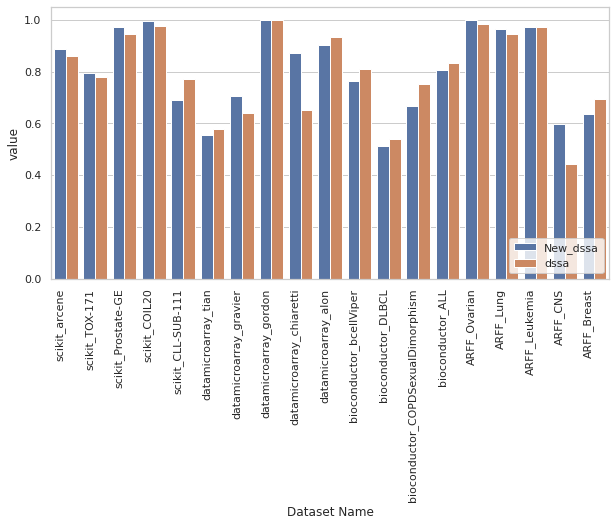

In [239]:
temp_df= algo_ranking[(algo_ranking["Filtering Algorithm"]=="dssa") | (algo_ranking["Filtering Algorithm"]=="New_dssa")]
#bar plot for the performance of each algorithm for each dataset
plt.figure(figsize=(10,5))
ax=sns.barplot(x="Dataset Name", y="value", hue="Filtering Algorithm", data=temp_df)
#name the axis
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
#change y axis scale
# plt.ylim(0.5,1)
#legend location
plt.legend(loc="lower right")
plt.xlabel("Dataset Name")


In [240]:
algo_ranking

,Dataset Name,Filtering Algorithm,Number of features selected (K),Learning algorithm,value,infrence_time,Fold,fs_time,Number of samples,Original Number of features,rank,bin_n_sample
7799,scikit_arcene,ReliefF,100,SVC,0.908404,0.000005,4.5,6.165671,200.0,9961.0,7,"(6249.0, 12600.0]"
7858,scikit_arcene,SVM,100,RandomForestClassifier,0.889319,0.000089,4.5,2023.215620,200.0,9961.0,6,"(6249.0, 12600.0]"
7738,scikit_arcene,New_dssa,100,RandomForestClassifier,0.887752,0.000480,4.5,205.670516,200.0,9961.0,5,"(6249.0, 12600.0]"
7618,scikit_arcene,Genetic,100,RandomForestClassifier,0.876961,0.000310,4.5,1232.903843,200.0,9961.0,4,"(6249.0, 12600.0]"
7678,scikit_arcene,MRMR,100,RandomForestClassifier,0.867086,0.000661,4.5,67.960358,200.0,9961.0,3,"(6249.0, 12600.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
57,ARFF_Breast,Genetic,100,LogisticRegression,0.753621,0.132252,0.0,1122.572471,97.0,24188.0,5,"(12600.0, 24188.0]"
278,ARFF_Breast,SVM,20,RandomForestClassifier,0.728979,3.104469,0.0,3169.971696,97.0,24188.0,4,"(12600.0, 24188.0]"
357,ARFF_Breast,dssa,100,LogisticRegression,0.694807,0.171478,0.0,601.382937,97.0,24188.0,3,"(12600.0, 24188.0]"
157,ARFF_Breast,New_dssa,20,LogisticRegression,0.634321,0.141277,0.0,601.548028,97.0,24188.0,2,"(12600.0, 24188.0]"
